#  Fitness Tracker: Track steps, heart rate, and workout sessions.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("fitness_tracker.csv")




In [56]:
df.columns

Index(['Date', 'Type', 'Distance (km)', 'Duration', 'Average Pace',
       'Average Speed (km/h)', 'Climb (m)', 'Average Heart Rate (bpm)',
       'Duration (minutes)'],
      dtype='object')

# Descriptive Statistics 
Descriptive statistics summarize your dataset to help understand key patterns and trends.

In [57]:
df.describe()


,Distance (km),Average Speed (km/h),Climb (m),Average Heart Rate (bpm),Duration (minutes)
count,294.000000,294.000000,294.000000,294.000000,294.000000
mean,13.503299,11.346633,175.846939,143.530612,72.108787
std,5.250721,2.086165,108.351975,10.583848,28.356295
min,0.760000,7.750000,6.000000,77.000000,5.250000
25%,10.020000,10.420000,95.250000,140.000000,54.470833
50%,12.775000,10.860000,163.500000,144.000000,67.683333
75%,15.857500,11.427500,208.750000,149.000000,82.766667
max,38.320000,23.990000,982.000000,172.000000,268.316667


Distance (km)
- What is the average distance covered?

- What is the longest and shortest activity?

In [13]:
print(df['Distance (km)'].mean())  # Average distance
print(df['Distance (km)'].max())   # Longest distance
print(df['Distance (km)'].min())   # Shortest distance


11.757834645669291
49.18
0.76


Duration
- What is the average time spent per activity?

- Is there a large variation in activity time?

In [14]:
print(df['Duration'].describe())  # Check overall summary


count       508
unique      458
top       32:00
freq          6
Name: Duration, dtype: object


Average Speed (km/h)
- What is the fastest and slowest speed recorded?

- Is speed consistent across activities, or does it vary a lot?

In [15]:
print(df['Average Speed (km/h)'].mean())  # Average speed
print(df['Average Speed (km/h)'].max())   # Fastest speed
print(df['Average Speed (km/h)'].min())   # Slowest speed


11.341653543307087
24.33
1.04


 Climb (m)
- What is the average elevation gain per activity?

- Are most workouts on flat terrain, or do they involve climbing?

In [18]:
print(df['Climb (m)'].mean())  # Average elevation gain
print(df['Climb (m)'].max())   # Highest climb recorded


128.0
982


Average Heart Rate (bpm)
- What is the average heart rate during workouts?

- Do heart rates fluctuate a lot, or are they stable?

In [19]:
print(df['Average Heart Rate (bpm)'].describe())


count    294.000000
mean     143.530612
std       10.583848
min       77.000000
25%      140.000000
50%      144.000000
75%      149.000000
max      172.000000
Name: Average Heart Rate (bpm), dtype: float64


Check for Outliers
- Are there extreme values in speed, or climb?

<Axes: xlabel='Distance (km)'>

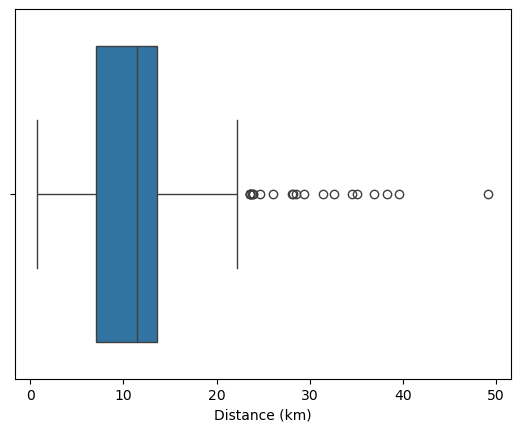

In [43]:


# Boxplots to detect outliers
sns.boxplot(x='Distance (km)',data=df)




<Axes: xlabel='Climb (m)'>

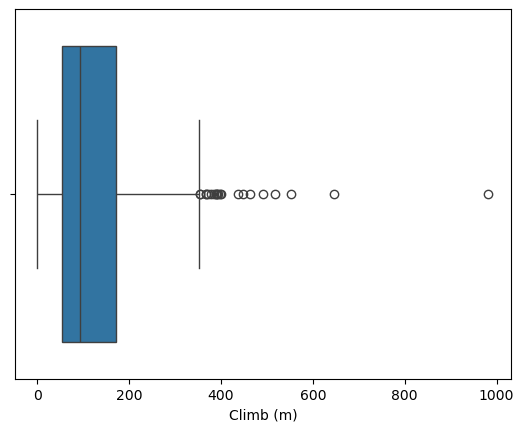

In [38]:
sns.boxplot(x='Climb (m)',data=df)

<Axes: xlabel='Average Speed (km/h)'>

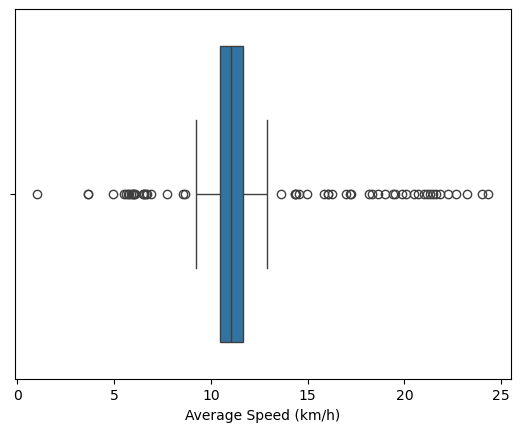

In [46]:
sns.boxplot(x='Average Speed (km/h)',data=df)

Check Skewness & Kurtosis
- Skewness: Is the data symmetrical or biased towards higher/lower values?

- Kurtosis: Does the data have more or fewer extreme values?

In [5]:

numeric_df = df.select_dtypes(include=['number'])

# Now, check skewness & kurtosis
print("Skewness:\n", numeric_df.skew())
print("Kurtosis:\n", numeric_df.kurtosis())

# Skewness
# 
# 0 → Perfectly symmetrical
# 
# > 0 → Right-skewed (more values on the left, long tail on the right)
# 
# < 0 → Left-skewed (more values on the right, long tail on the left)
# 
# Kurtosis
# 
# > 3 → More outliers (leptokurtic, heavy tails)
# 
# ≈ 3 → Normal distribution
# 
# < 3 → Fewer outliers (platykurtic, light tails)

Skewness:
 Distance (km)               1.386049
Average Speed (km/h)        2.094821
Climb (m)                   2.117396
Average Heart Rate (bpm)   -2.086920
dtype: float64
Kurtosis:
 Distance (km)                4.515589
Average Speed (km/h)         9.515604
Climb (m)                    8.824241
Average Heart Rate (bpm)    11.032643
dtype: float64


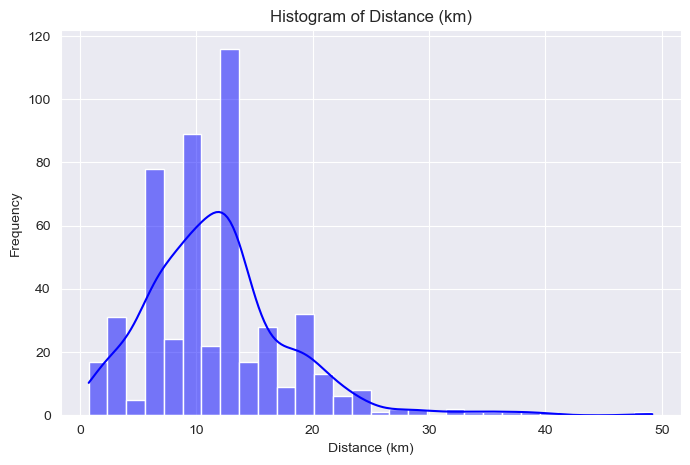

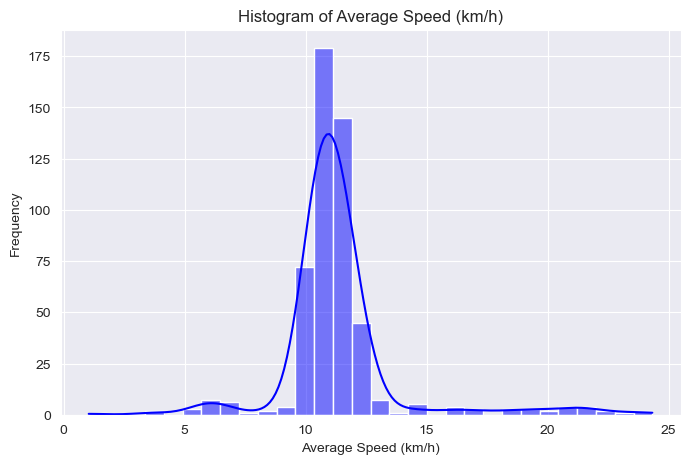

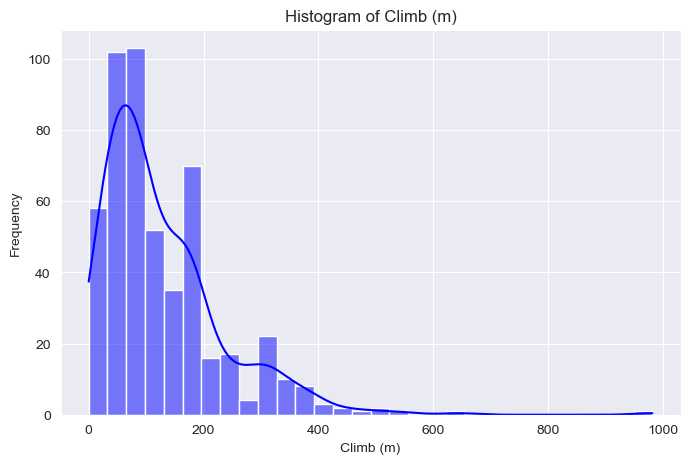

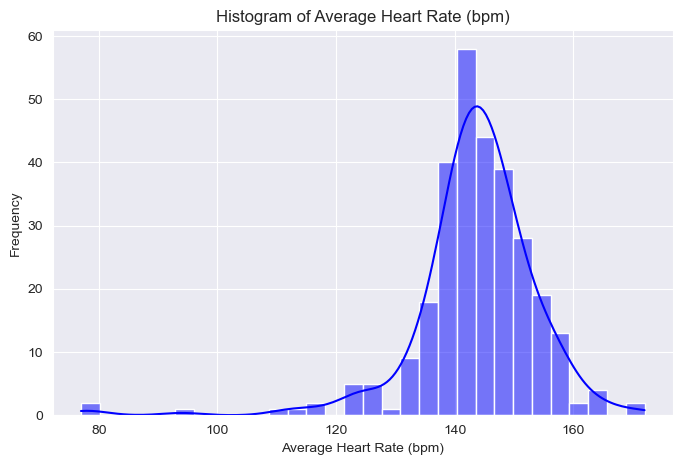

In [6]:
# Plot histograms for each numeric column
for column in numeric_df.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(numeric_df[column], bins=30, kde=True, color="blue")  # KDE adds a smooth curve
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()
    
    
#     How to Interpret the Histogram
# If the tail is longer on the right, it's right-skewed (positive skewness).
# 
# If the tail is longer on the left, it's left-skewed (negative skewness).
# 
# If it’s bell-shaped & symmetrical, it's approximately normal.

Correlation Analysis
- Find relationships between variables (e.g., does longer duration lead to more calories burned?).

                          Distance (km)  Average Speed (km/h)  Climb (m)  \
Distance (km)                  1.000000              0.466094   0.800114   
Average Speed (km/h)           0.466094              1.000000   0.222888   
Climb (m)                      0.800114              0.222888   1.000000   
Average Heart Rate (bpm)      -0.185313             -0.317188  -0.081439   

                          Average Heart Rate (bpm)  
Distance (km)                            -0.185313  
Average Speed (km/h)                     -0.317188  
Climb (m)                                -0.081439  
Average Heart Rate (bpm)                  1.000000  


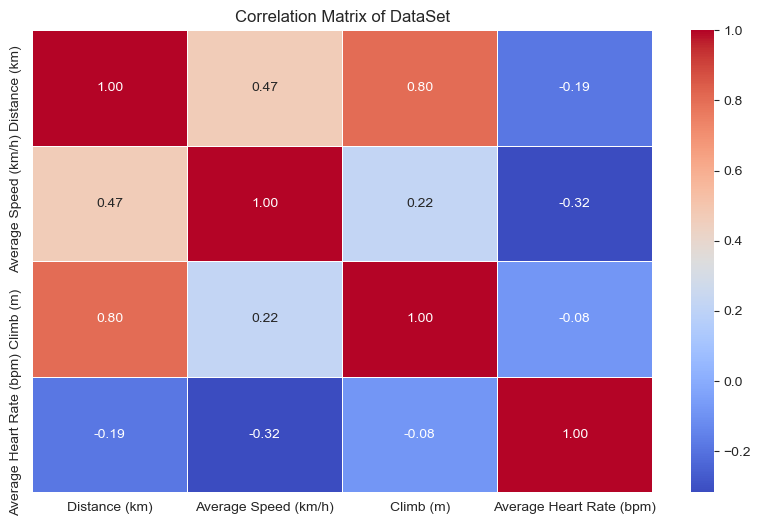

In [7]:
print(numeric_df.corr())
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm",fmt=".2f",linewidths=0.5)
plt.title("Correlation Matrix of DataSet")
plt.show()


- Climb (m) and Distance (km) are highly correlated → Steeper climbs are linked to longer distances.

- Speed and Heart Rate have a slight negative correlation → People with higher speed tend to have a lower heart rate, possibly indicating better endurance.


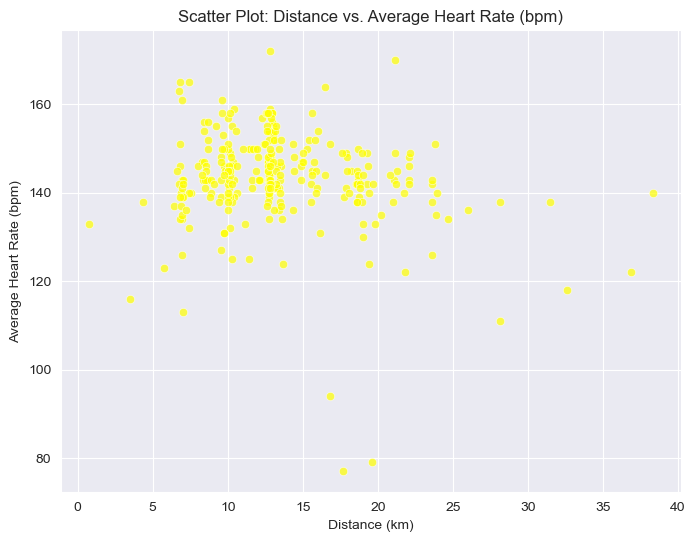

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Distance (km)", y="Average Heart Rate (bpm)", alpha=0.7, color="yellow")


plt.xlabel("Distance (km)")
plt.ylabel("Average Heart Rate (bpm)")
plt.title("Scatter Plot: Distance vs. Average Heart Rate (bpm)")

plt.show()


In [13]:
df.columns

Index(['Date', 'Type', 'Distance (km)', 'Duration', 'Average Pace',
       'Average Speed (km/h)', 'Climb (m)', 'Average Heart Rate (bpm)'],
      dtype='object')

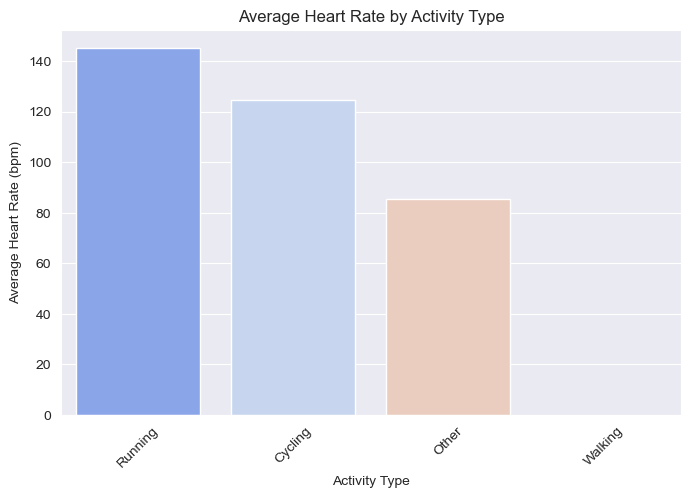

In [15]:
# Group by activity type and calculate average heart rate
activity_heart_rate = df.groupby('Type')['Average Heart Rate (bpm)'].mean().reset_index()

# Sort by heart rate (optional)
activity_heart_rate = activity_heart_rate.sort_values(by='Average Heart Rate (bpm)', ascending=False)

# Plot bar chart with hue for color mapping
plt.figure(figsize=(8, 5))
sns.barplot(x='Type', y='Average Heart Rate (bpm)', hue='Type', data=activity_heart_rate, dodge=False, palette="coolwarm", legend=False)

# Formatting
plt.title("Average Heart Rate by Activity Type")
plt.xlabel("Activity Type")
plt.ylabel("Average Heart Rate (bpm)")
plt.xticks(rotation=45)  # Rotate labels if needed
plt.show()

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

# Sort data by Date
df = df.sort_values(by='Date')
df['Date'] = df['Date'].dt.date


In [24]:
df.head()

,Date,Type,Distance (km),Duration,Average Pace,Average Speed (km/h),Climb (m),Average Heart Rate (bpm)
507,2012-08-22,Running,5.69,31:08,5:29,10.95,32,NaN
506,2012-08-24,Running,3.15,16:00,5:05,11.82,17,NaN
505,2012-08-24,Walking,1.49,13:43,9:14,6.49,9,NaN
504,2012-08-24,Walking,1.48,17:56,12:09,4.94,12,NaN
503,2012-08-28,Walking,1.57,13:39,8:41,6.91,7,NaN


# Time-Series Analysis

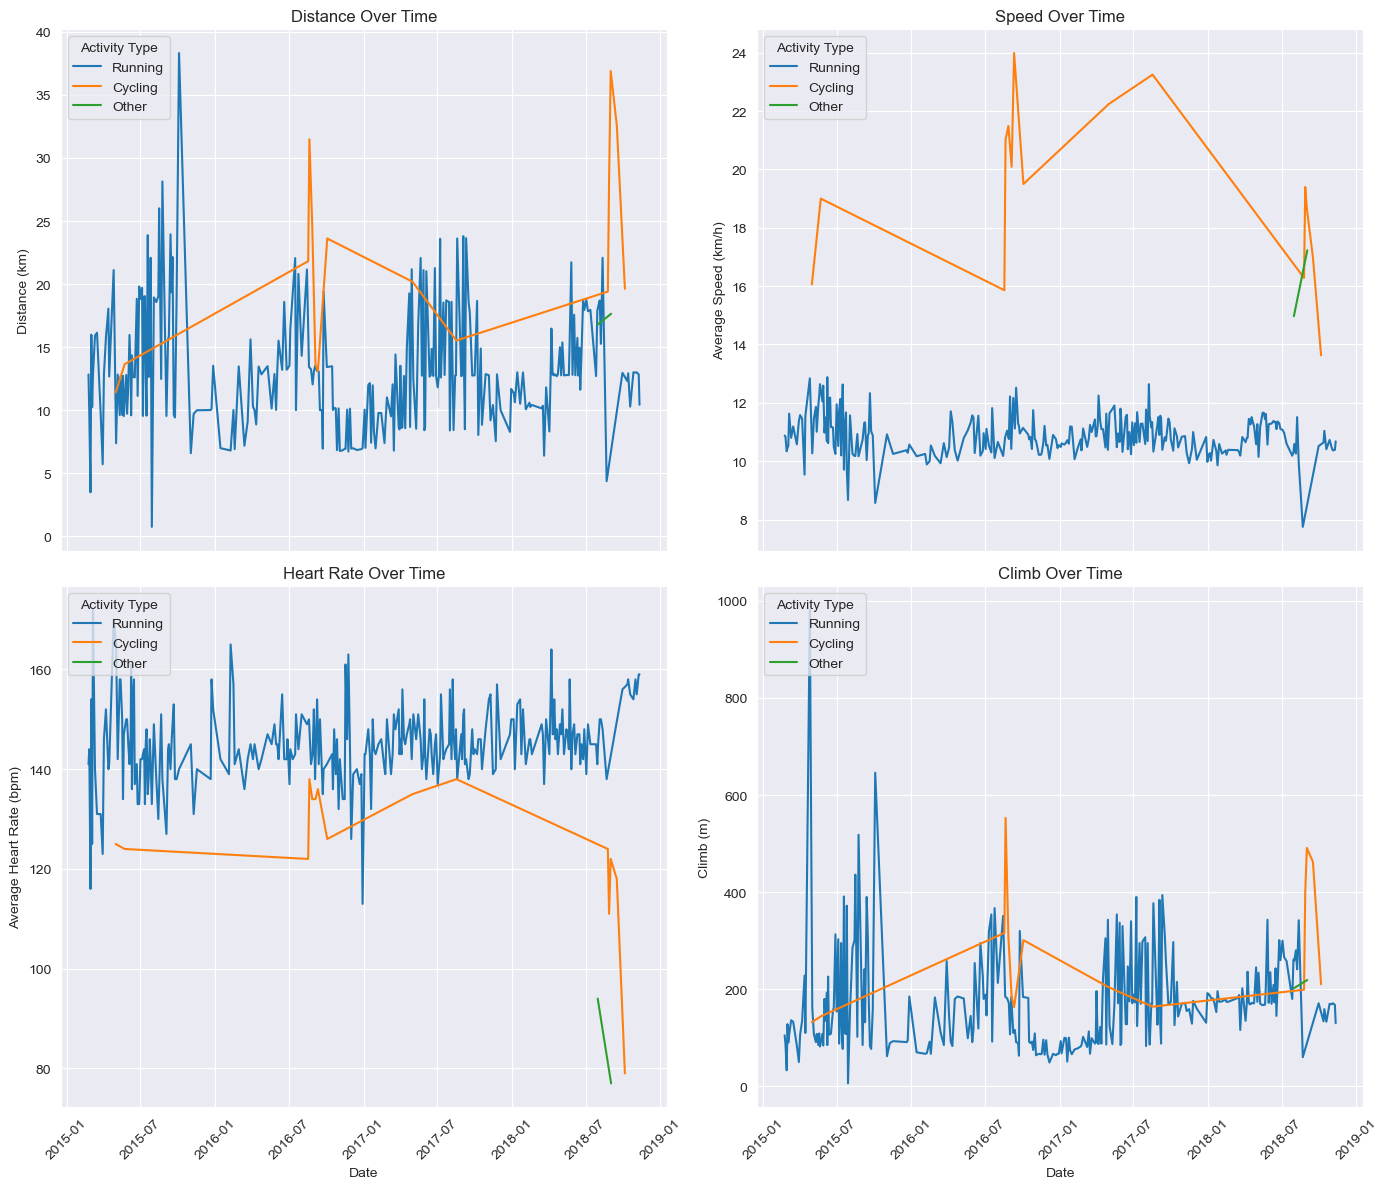

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size and create subplots (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(14, 12), sharex=True)

metrics = ['Distance (km)', 'Average Speed (km/h)', 'Average Heart Rate (bpm)', 'Climb (m)']
titles = ["Distance Over Time", "Speed Over Time", "Heart Rate Over Time", "Climb Over Time"]

# Loop through each subplot and plot
for i, ax in enumerate(axes.flat):  # Flatten the 2D array of axes
    sns.lineplot(data=df, x='Date', y=metrics[i], hue='Type', ax=ax)
    ax.set_title(titles[i])
    ax.set_xlabel("Date")
    ax.set_ylabel(metrics[i])
    ax.tick_params(axis='x', rotation=45)
    ax.legend(title='Activity Type', loc='upper left')  # Customize legend position if needed

plt.tight_layout()
plt.show()


In [7]:

# Function to convert duration to total minutes
def convert_to_minutes(time_str):
    time_parts = time_str.split(":")  # Split by colon
    if len(time_parts) == 3:  # Format: HH:MM:SS
        hours, minutes, seconds = map(int, time_parts)
    elif len(time_parts) == 2:  # Format: MM:SS
        hours, minutes, seconds = 0, *map(int, time_parts)  
    else:
        return None  # Handle unexpected formats
    
    return hours * 60 + minutes + seconds / 60  # Convert to total minutes

In [9]:
# Apply function to Duration column
df['Duration (minutes)'] = df['Duration'].apply(convert_to_minutes)

In [34]:
df

,Date,Type,Distance (km),Duration,Average Pace,Average Speed (km/h),Climb (m),Average Heart Rate (bpm),Duration (minutes)
507,2012-08-22,Running,5.69,31:08,5:29,10.95,32,NaN,31.133333
506,2012-08-24,Running,3.15,16:00,5:05,11.82,17,NaN,16.000000
505,2012-08-24,Walking,1.49,13:43,9:14,6.49,9,NaN,13.716667
504,2012-08-24,Walking,1.48,17:56,12:09,4.94,12,NaN,17.933333
503,2012-08-28,Walking,1.57,13:39,8:41,6.91,7,NaN,13.650000
...,...,...,...,...,...,...,...,...,...
4,2018-10-27,Running,13.02,1:12:50,5:36,10.73,170,154.0,72.833333
3,2018-11-01,Running,12.98,1:14:25,5:44,10.47,169,158.0,74.416667
2,2018-11-04,Running,13.01,1:15:16,5:47,10.37,171,155.0,75.266667
1,2018-11-09,Running,12.84,1:14:12,5:47,10.39,168,159.0,74.200000


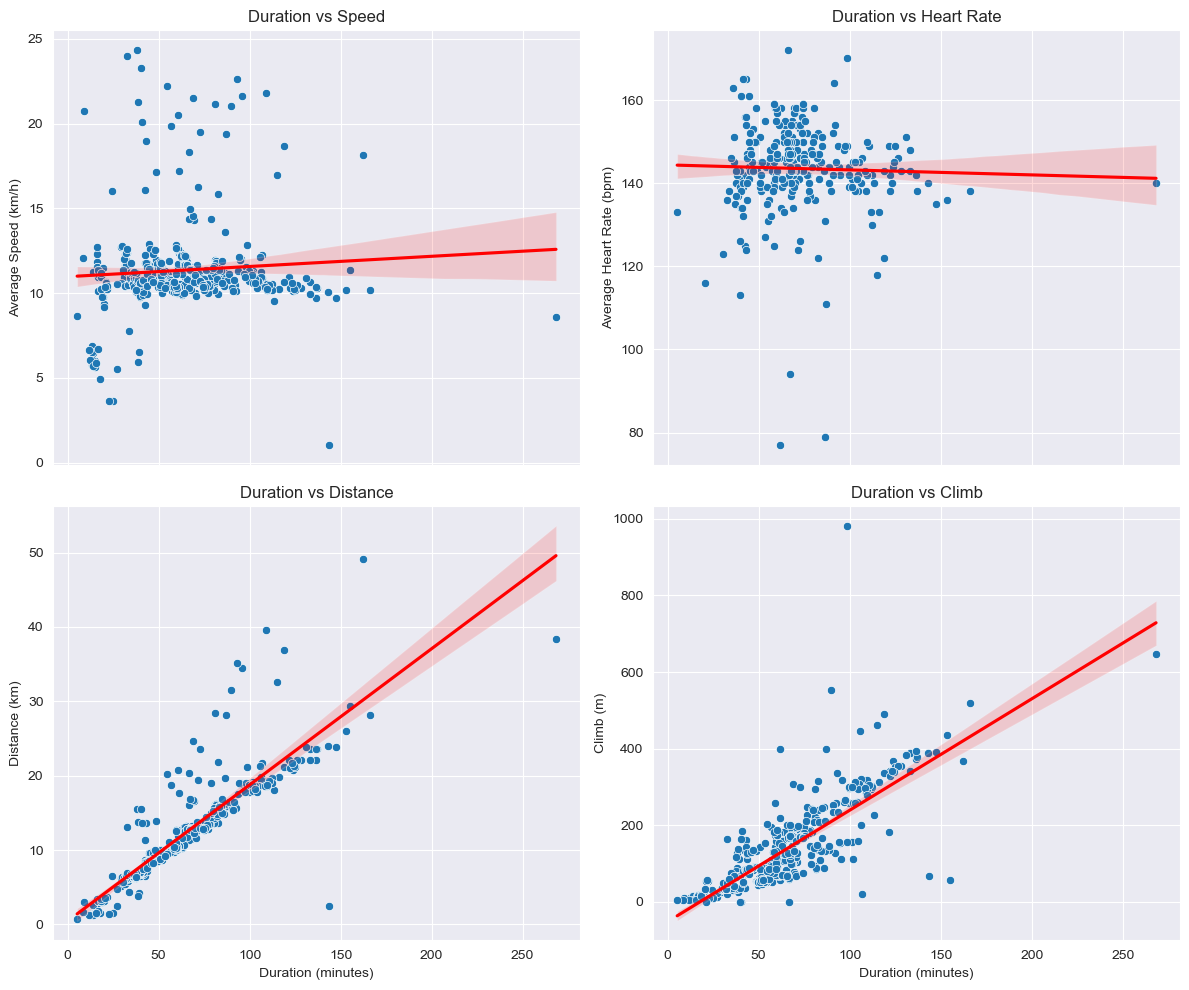

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size and create subplots (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharex=True)

# Define the metrics to compare with Duration
metrics = ['Average Speed (km/h)', 'Average Heart Rate (bpm)', 'Distance (km)', 'Climb (m)']
titles = ["Duration vs Speed", "Duration vs Heart Rate", "Duration vs Distance", "Duration vs Climb"]

# Loop through each metric and create a scatter plot
for i, ax in enumerate(axes.flat):
    sns.scatterplot(x=df['Duration (minutes)'], y=df[metrics[i]], ax=ax)
    sns.regplot(x=df['Duration (minutes)'], y=df[metrics[i]], ax=ax, scatter=False, color="red")  
    ax.set_title(titles[i])
    ax.set_xlabel("Duration (minutes)")
    ax.set_ylabel(metrics[i])

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


 1. Duration vs Speed
📉 Slight negative slope: As duration increases, average speed slightly decreases.

🧠 Interpretation: Longer sessions might be slower — could be due to fatigue or longer but more relaxed activities.

🔎 2. Duration vs Heart Rate
➖ Almost flat line: No strong trend between duration and average heart rate.

🧠 Interpretation: Heart rate doesn’t consistently rise or fall with duration — possibly affected more by activity intensity than time.

🔎 3. Duration vs Distance
📈 Strong positive slope: More duration leads to more distance.

✅ Perfectly expected – you travel more the longer you move. This is a strong linear relationship.

🔎 4. Duration vs Climb
📈 Positive trend with some noise: As duration increases, climb generally increases too.

🧠 Interpretation: Longer workouts often include more elevation gain, though there's some variation (maybe depending on terrain).


# Relationships between different datasets using Cluster Map

In [12]:
df = df.dropna()  # Removes rows with NaN values


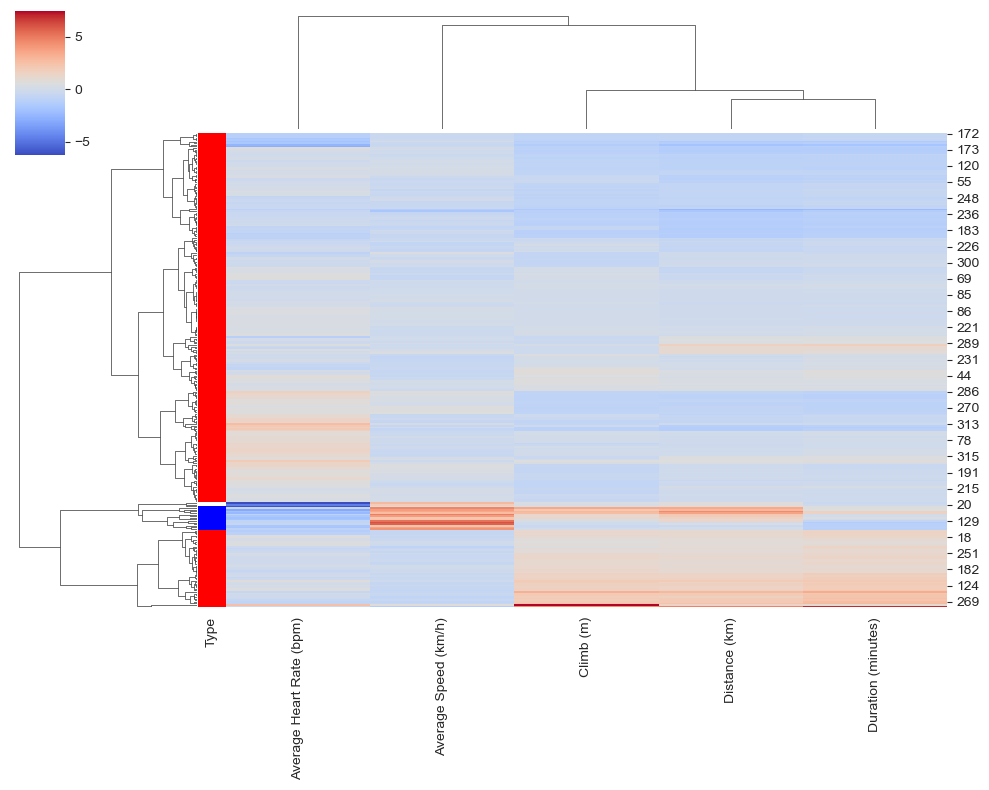

In [13]:

# Define colors for activity types
activity_colors = {
    "Running": "red",
    "Cycling": "blue",
    
   
}

# Map colors to activities
row_colors = df["Type"].map(activity_colors)

# Select numerical columns for clustering
cluster_data = df[['Distance (km)', 'Duration (minutes)', 'Average Speed (km/h)', 
                   'Average Heart Rate (bpm)', 'Climb (m)']]

# Normalize the data for better clustering
cluster_data = (cluster_data - cluster_data.mean()) / cluster_data.std()

# Create clustermap with workout type colors
sns.clustermap(cluster_data, cmap="coolwarm", method="ward", row_colors=row_colors, figsize=(10, 8))

# Show the plot
plt.show()
